## Import Libraries

In [3]:
# Import pandas library
import pandas as pd

# Import DataReader, Just type pip install pandas_datareader in your anaconda prompt
from pandas_datareader import DataReader

from datetime import date

# 1.Importing stock listing data from Excel

## Reading, inspecting, & cleaning data from csv files

### Import stock listing info from the NASDAQ

In [10]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/nasdaq-listings.csv')
# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

  IPO Year             Sector  \
0     1980         Technology   
1      NAN         Technology   
2     2004         Technology   
3     1986         Technology   
4     199

### Read data using .read_csv() with adequate parsing arguments

#### .read_csv() options:

##### na_values: Converts a given string to np.nan, defaults to None
##### parse_dates: Reads the data in a list of given columns as dtype datetime64, defaults to False

In [11]:
# Import the data
nasdaq = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
print(nasdaq.head())

# Inspect the data
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

## Read data from Excel worksheets


### Load listing info from a single sheet

In [12]:
# Import the data
nyse = pd.read_excel('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx', sheetname='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

### Load listing data from two sheets

In [17]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


## Combine data from multiple worksheets


###  Load all listing data and iterate over key-value dictionary pairs

In [18]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx', sheetname='nyse', na_values='n/a')
nasdaq = pd.read_excel('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx', sheetname='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### Automate the loading and combining of data from multiple Excel worksheets

In [19]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


# 2.Importing financial data from the web

## The DataReader: Access financial data online

### Get stock data for a single company

In [8]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016, 12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'google'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

              Open    High     Low   Close    Volume
Date                                                
2016-11-25  111.47  111.87  110.95  111.79  11475922
2016-11-28  111.43  112.46  111.39  111.57  27193983
2016-11-29  110.78  112.03  110.07  111.46  28528750
2016-11-30  111.60  112.20  110.27  110.52  36162258
2016-12-01  110.36  110.94  109.03  109.49  37086862
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-25 to 2017-11-22
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


### Visualize a stock price trend

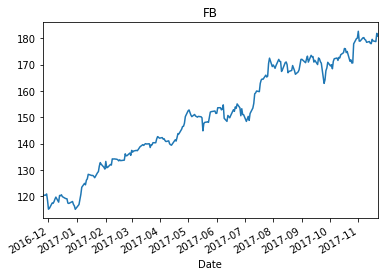

In [10]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'google'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot Close
stock_prices['Close'].plot(title=ticker)

# Show the plot
plt.show()

## Economic data from the Federal Reserve


### Visualize the long-term gold price trend

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12953 entries, 1968-04-01 to 2017-11-22
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12555 non-null float64
dtypes: float64(1)
memory usage: 202.4 KB


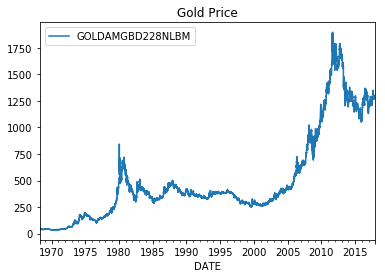

In [13]:
# Set start date
start = date(1968, 1, 1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

### Compare labor market participation and unemployment rates

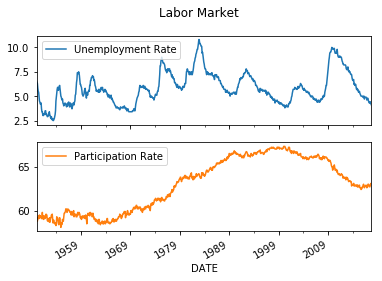

In [14]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start=start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate','Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

###  Compare bond and stock performance

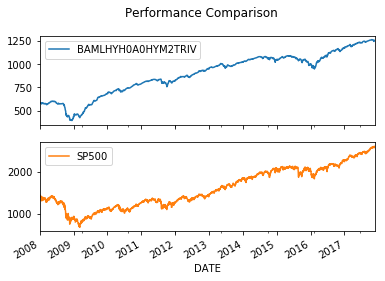

In [15]:
# Set the start date
start = date(2008, 1, 1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(title='Performance Comparison',subplots=True)

# Show the plot
plt.show()

## Select stocks and get data from Google Finance

### Select the top 5 listed consumer companies 

In [19]:
# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

                   Company Name Exchange  Market Capitalization
4              Amazon.com, Inc.   nasdaq           4.221385e+11
3013      Wal-Mart Stores, Inc.     nyse           2.218646e+11
3014  Walt Disney Company (The)     nyse           1.789973e+11
6           Comcast Corporation   nasdaq           1.764745e+11
1438     Home Depot, Inc. (The)     nyse           1.752626e+11


### Get the ticker of the largest consumer services company

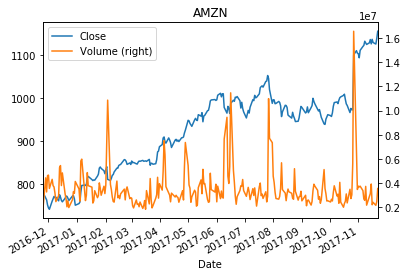

In [41]:
# Get ticker of the largest Consumer Services company
ticker = listings.loc[listings.Sector=='Consumer Services', 'Market Capitalization'].idxmax()
ticker

# Set the start date
start = date(2012, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

### Get the largest consumer company listed after 1998

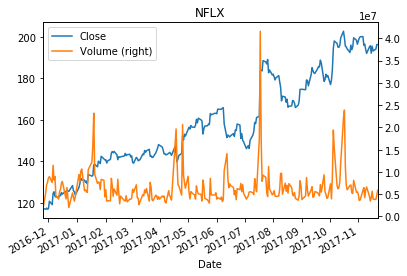

In [43]:
# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(1998, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

## Get several stocks & manage a MultiIndex

###  Get data for the 3 largest financial companies

In [44]:
# Get ticker of 3 largest finance companies
top_3_companies = listings.loc[listings.Sector=='Finance','Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2012, 1, 1)

# Import stock data
data = DataReader(top_3_tickers, 'google', start)
data2 = data.to_frame()

# Unstack and inspect result
data2['Close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2016-11-25 to 2017-11-22
Data columns (total 3 columns):
BAC    250 non-null float64
JPM    250 non-null float64
WFC    250 non-null float64
dtypes: float64(3)
memory usage: 7.8 KB


# Summarizing your data and visualizing the result

## Summarize your data with descriptive stats

### List the poorest and richest countries worldwide

#### Result: The countries with the highest per capita income are Qatar, Macao SAR, Luxembourg, Singapore, and Brunei.

In [20]:
# Import the data
income = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Country              184 non-null object
Income per Capita    184 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


### Global incomes: Central tendency

#### Result: Rounded down to the nearest thousand, the most common value in Income per Capita is 1.0.

In [46]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573694
11620.932519999998


0    1.0
dtype: float64

###  Describe the distribution of your data with quantiles



##  Global incomes: Dispersion

In [21]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, mean+std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([.25, .75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[.75] - quantiles[.25]
print(iqr)

[-2497.441641469137, 41436.28077294301]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.39573
